In [1]:
from phw_lib import *

In [2]:
# visualize walkouts for spectral peaks of sin wave and pure noise
fs = 0.5
dt = 1/fs
time_duration = 120000
n_samples = int(time_duration/dt)
t = np.arange(0, time_duration, dt)
freqs = np.fft.fftfreq(len(t), dt)

# fix random seed for reproducibility
np.random.seed(0)

sin_wave_freq = 5*1e-3
sin_wave_phase = np.pi/4
sin_wave_amp = 1.0
sin_wave = sin_wave_amp * np.sin(2 * np.pi * sin_wave_freq * t + sin_wave_phase)

search_lower_range = 3*1e-3
search_upper_range = 12*1e-3

noise = np.random.normal(0, 1, size=n_samples)

# bandpass filter parameters
lower_freq = 2.5*1e-3
upper_freq = 12.5*1e-3

# find peaks within the frequency range for lowpass noise that has high R^2 value
fft_amp = np.abs(np.fft.fft(noise))
peaks, _ = find_peaks(fft_amp, distance=20)
peaks = peaks[np.logical_and(freqs[peaks] > search_lower_range, freqs[peaks] < search_upper_range)]

# select the peaks with high amplitude
peaks = peaks[np.argsort(fft_amp[peaks])][::-1][:30]

R_2_values = [calculate_walkout_R2(noise, dt, freqs[peak]) for peak in peaks]
peaks = peaks[np.argsort(R_2_values)][::-1][:4]

# get two random non-peak frequencies by random sampling from low amplitude indexes within the frequency range
random_freq_list = []
low_amp_indexes = np.where(fft_amp < np.mean(fft_amp))[0]
low_amp_indexes = low_amp_indexes[np.logical_and(freqs[low_amp_indexes] > search_lower_range, freqs[low_amp_indexes] < search_upper_range)]
for i in range(2):
    random_freq = np.random.choice(freqs[low_amp_indexes])
    random_freq_list.append(random_freq)

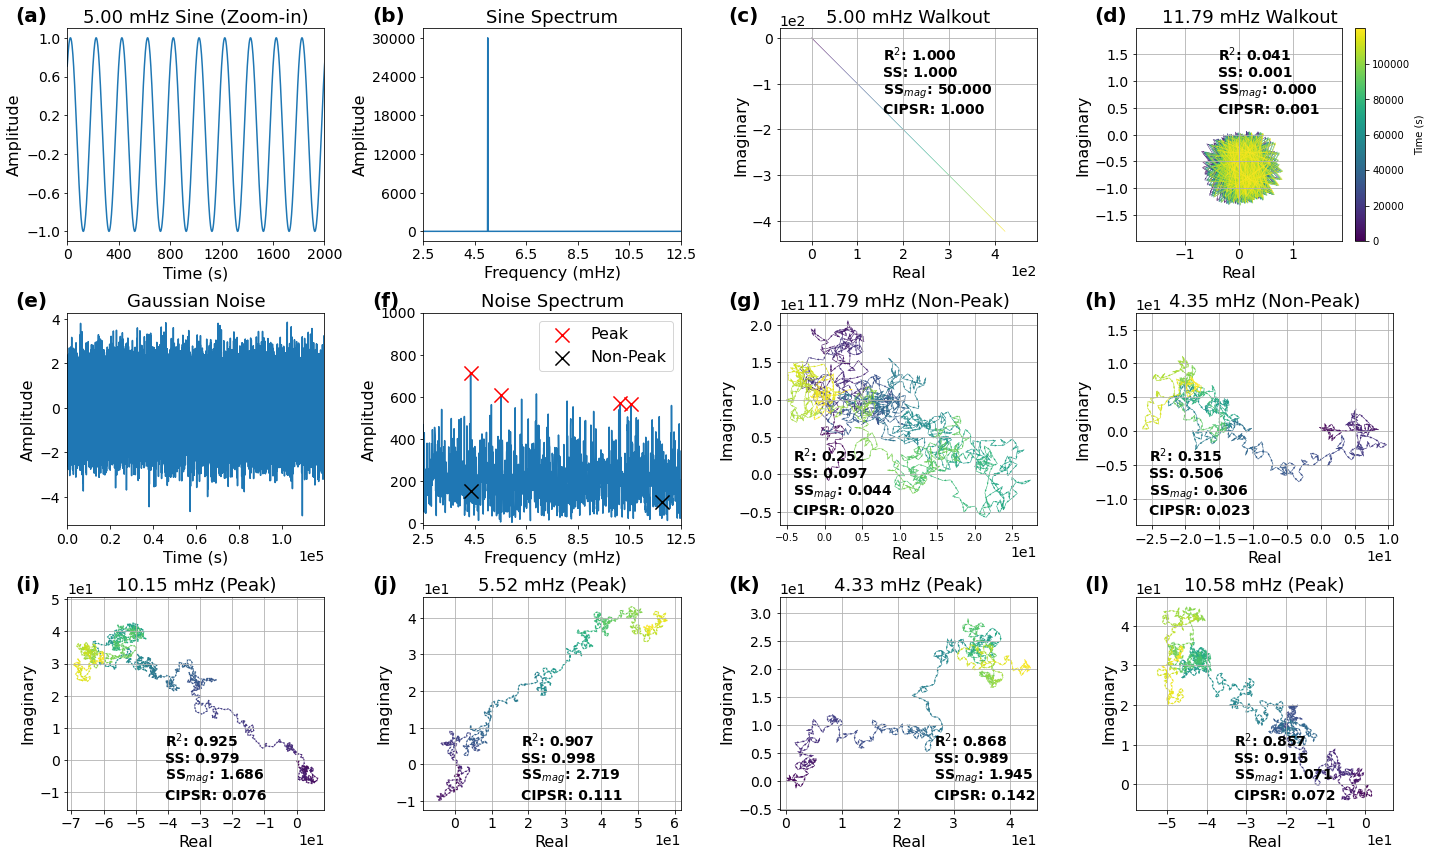

In [3]:
fft_amp = np.abs(np.fft.fft(noise))
plt.figure(figsize=(20, 12))
plt.subplot(3, 4, 1)
plt.plot(t, sin_wave)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[1000]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('{:.2f} mHz Sine (Zoom-in)'.format(sin_wave_freq*1e3), fontsize=18)
# ticks are too many, so make them less
plt.xticks(np.arange(t[0], t[1000]*1.0001, (t[1000]-t[0])/5), fontsize=14)
plt.yticks(np.arange(np.min(sin_wave), np.max(sin_wave)*1.0001, (np.max(sin_wave)-np.min(sin_wave))/5), fontsize=14)
# add (a) to the subplot
plt.text(-0.2, 1.03, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 2)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(sin_wave))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine Spectrum'.format(sin_wave_freq*1e3), fontsize=18)
# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (b) to the subplot
plt.text(-0.2, 1.03, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')
#plt.gca().ticklabel_format(axis='both', style='sci', scilimits=(0,0))

plt.subplot(3, 4, 3)
visualize_walkout_for_subplot_sum_with_period(sin_wave, dt, sin_wave_freq)
R2 = calculate_walkout_R2(sin_wave, dt, sin_wave_freq)
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, sin_wave_freq) # CIPSR
#sum_ratio_unit = linearity_measure_by_sum_ratio_unit(sin_wave, dt, sin_wave_freq) # CIPSR-Unit
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, sin_wave_freq)

plt.title('{:.2f} mHz Walkout'.format(sin_wave_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (c) to the subplot
plt.text(-0.2, 1.03, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 4)
random_freq = random_freq_list[0]
visualize_walkout_for_subplot_sum_with_period(sin_wave, dt, random_freq)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap='viridis'), label='Time (s)')
sum_ratio = linearity_measure_by_sum_ratio(sin_wave, dt, random_freq)
R2 = calculate_walkout_R2(sin_wave, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(sin_wave, dt, random_freq)
plt.title('    {:.2f} mHz Walkout'.format(random_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (d) to the subplot
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.text(-0.2, 1.03, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 5)
plt.plot(t, noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('Gaussian Noise', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (e) to the subplot
plt.text(-0.2, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
# set the fontsize of the scientific notation (e.g. 1e-3) to 14


plt.subplot(3, 4, 6)
# plot the positive frequencies
plt.plot(freqs[:int(len(freqs)/2)], np.abs(np.fft.fft(noise))[:int(len(freqs)/2)])
plt.scatter(freqs[peaks], fft_amp[peaks], color='r', marker='x', s=200, label='Peak', zorder=10)
plt.scatter(random_freq_list, np.abs(np.fft.fft(noise))[np.where(np.isin(freqs, random_freq_list))], color='k', marker='x', s=200, label='Non-Peak', zorder=10)
plt.legend(loc='upper right', fontsize=16)

plt.xlim([lower_freq, upper_freq])
plt.ylim([-10, 1000])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Noise Spectrum', fontsize=18)

# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5),
                ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(fontsize=14)
# add (f) to the subplot
plt.text(-0.2, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 7)
visualize_walkout_for_subplot_sum_with_period(noise, dt, random_freq)
R2 = calculate_walkout_R2(noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.05, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.yticks(fontsize=14)
# add (g) to the subplot
plt.text(-0.2, 1.03, '(g)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 8)
random_freq = random_freq_list[1]
visualize_walkout_for_subplot_sum_with_period(noise, dt, random_freq)
R2 = calculate_walkout_R2(noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.05, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (h) to the subplot
plt.text(-0.2, 1.03, '(h)', transform=plt.gca().transAxes, size=20, weight='bold')

for i, peak in enumerate(peaks):
    plt.subplot(3, 4, 9+i)
    visualize_walkout_for_subplot_sum_with_period(noise, dt, freqs[peak])
    R2 = calculate_walkout_R2(noise, dt, freqs[peak])
    sum_ratio = linearity_measure_by_sum_ratio(noise, dt, freqs[peak])
    schuster_significance, ss_log = schuster_test_for_phasor_walkout(noise, dt, freqs[peak])
    plt.title('{:.2f} mHz (Peak)'.format(freqs[peak]*1e3), fontsize=18)
    if i != 2:
        plt.text(0.38, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
    else:
        plt.text(0.60, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if i == 0:
        # add (i) to the subplot
        plt.text(-0.2, 1.03, '(i)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 1:
        # add (j) to the subplot
        plt.text(-0.2, 1.03, '(j)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 2:
        # add (k) to the subplot
        plt.text(-0.2, 1.03, '(k)', transform=plt.gca().transAxes, size=20, weight='bold')
    else:
        # add (l) to the subplot
        plt.text(-0.2, 1.03, '(l)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('Figure1.jpg', dpi=500)
plt.show()
plt.close()

In [4]:
# bandpass filter the noise
lowpass_noise = butter_bandpass_filter(noise, lower_freq, upper_freq, fs, order=4)
lowpass_noise = lowpass_noise - np.mean(lowpass_noise)

# bandpass filter the sine wave
lowpass_sin_wave = butter_bandpass_filter(sin_wave, lower_freq, upper_freq, fs, order=4)
lowpass_sin_wave = lowpass_sin_wave - np.mean(lowpass_sin_wave)

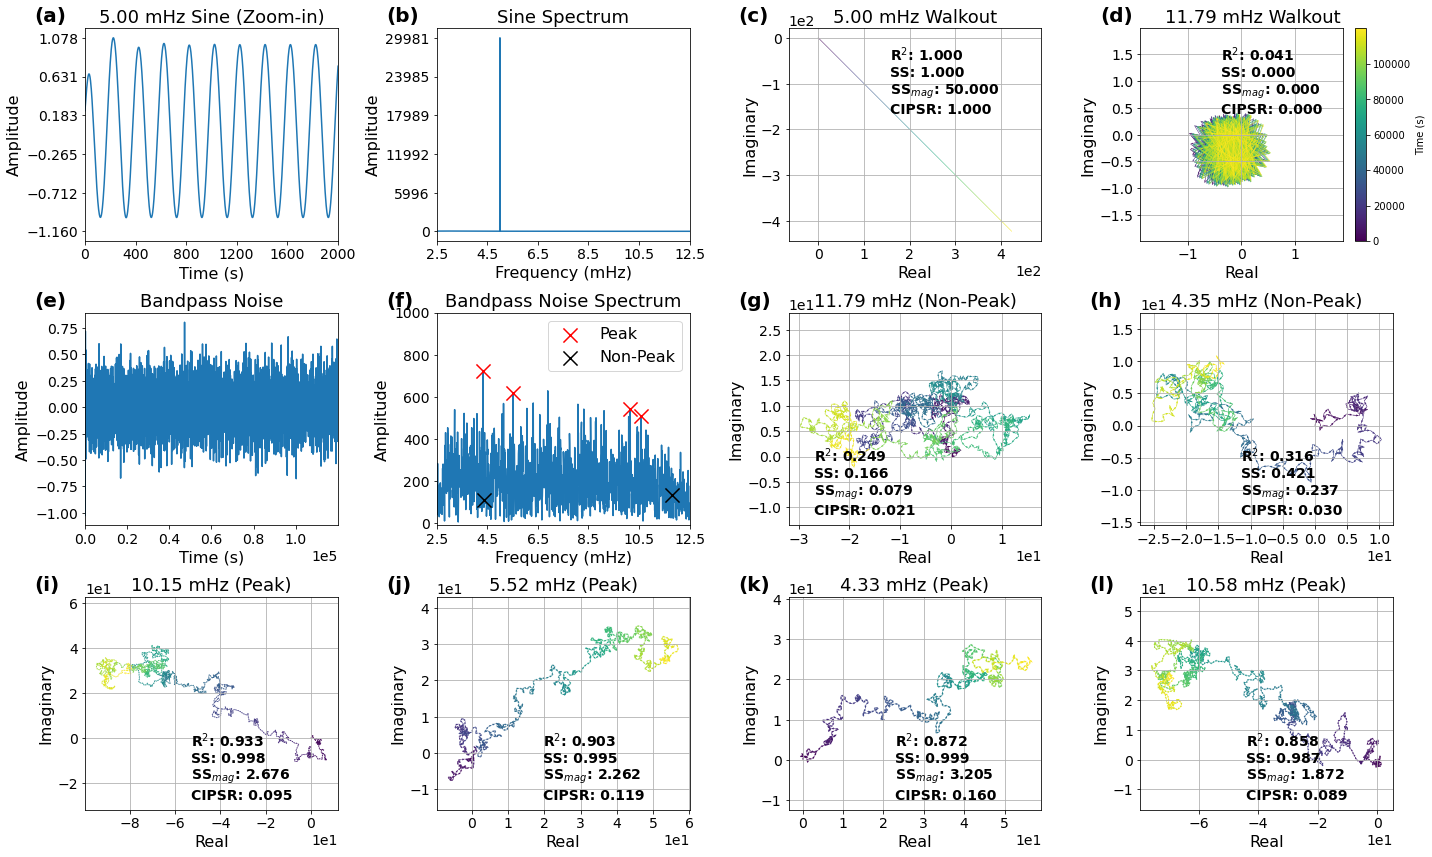

In [5]:
fft_amp = np.abs(np.fft.fft(lowpass_noise))
plt.figure(figsize=(20, 12))
plt.subplot(3, 4, 1)
plt.plot(t, lowpass_sin_wave)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[1000]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('{:.2f} mHz Sine (Zoom-in)'.format(sin_wave_freq*1e3), fontsize=18)
# ticks are too many, so make them less
plt.xticks(np.arange(t[0], t[1000]*1.0001, (t[1000]-t[0])/5), fontsize=14)
plt.yticks(np.arange(np.min(lowpass_sin_wave), np.max(lowpass_sin_wave)*1.0001, (np.max(lowpass_sin_wave)-np.min(lowpass_sin_wave))/5), fontsize=14)
# add (a) to the subplot
plt.text(-0.2, 1.03, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 2)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(lowpass_sin_wave))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine Spectrum'.format(sin_wave_freq*1e3), fontsize=18)
# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (b) to the subplot
plt.text(-0.2, 1.03, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 3)
visualize_walkout_for_subplot_sum_with_period(lowpass_sin_wave, dt, sin_wave_freq)
R2 = calculate_walkout_R2(lowpass_sin_wave, dt, sin_wave_freq)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_sin_wave, dt, sin_wave_freq) # CIPSR
#sum_ratio_unit = linearity_measure_by_sum_ratio_unit(lowpass_sin_wave, dt, sin_wave_freq) # CIPSR-Unit
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_sin_wave, dt, sin_wave_freq)
plt.title('{:.2f} mHz Walkout'.format(sin_wave_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (c) to the subplot
plt.text(-0.2, 1.03, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 4)
random_freq = random_freq_list[0]
visualize_walkout_for_subplot_sum_with_period(lowpass_sin_wave, dt, random_freq)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap='viridis'), label='Time (s)')
sum_ratio = linearity_measure_by_sum_ratio(lowpass_sin_wave, dt, random_freq)
R2 = calculate_walkout_R2(lowpass_sin_wave, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_sin_wave, dt, random_freq)
plt.title('    {:.2f} mHz Walkout'.format(random_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (d) to the subplot
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.text(-0.2, 1.03, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 5)
plt.plot(t, lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Noise', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (e) to the subplot
plt.text(-0.2, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
plt.subplot(3, 4, 6)
# plot the positive frequencies
plt.plot(freqs[:int(len(freqs)/2)], np.abs(np.fft.fft(lowpass_noise))[:int(len(freqs)/2)])
plt.scatter(freqs[peaks], fft_amp[peaks], color='r', marker='x', s=200, label='Peak', zorder=10)
plt.scatter(random_freq_list, np.abs(np.fft.fft(lowpass_noise))[np.where(np.isin(freqs, random_freq_list))], color='k', marker='x', s=200, label='Non-Peak', zorder=10)
plt.legend(loc='upper right', fontsize=16)

plt.xlim([lower_freq, upper_freq])
plt.ylim([-10, 1000])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Bandpass Noise Spectrum', fontsize=18)

# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5),
                ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(fontsize=14)
# add (f) to the subplot
plt.text(-0.2, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 7)
visualize_walkout_for_subplot_sum_with_period(lowpass_noise, dt, random_freq)
R2 = calculate_walkout_R2(lowpass_noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.10, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (g) to the subplot
plt.text(-0.2, 1.03, '(g)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 8)
random_freq = random_freq_list[1]
visualize_walkout_for_subplot_sum_with_period(lowpass_noise, dt, random_freq)
R2 = calculate_walkout_R2(lowpass_noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.40, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (h) to the subplot
plt.text(-0.2, 1.03, '(h)', transform=plt.gca().transAxes, size=20, weight='bold')

for i, peak in enumerate(peaks):
    plt.subplot(3, 4, 9+i)
    visualize_walkout_for_subplot_sum_with_period(lowpass_noise, dt, freqs[peak])
    R2 = calculate_walkout_R2(lowpass_noise, dt, freqs[peak])
    sum_ratio = linearity_measure_by_sum_ratio(lowpass_noise, dt, freqs[peak])
    schuster_significance, ss_log = schuster_test_for_phasor_walkout(lowpass_noise, dt, freqs[peak])
    plt.title('{:.2f} mHz (Peak)'.format(freqs[peak]*1e3), fontsize=18)
    plt.text(0.42, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if i == 0:
        # add (i) to the subplot
        plt.text(-0.2, 1.03, '(i)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 1:
        # add (j) to the subplot
        plt.text(-0.2, 1.03, '(j)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 2:
        # add (k) to the subplot
        plt.text(-0.2, 1.03, '(k)', transform=plt.gca().transAxes, size=20, weight='bold')
    else:
        # add (l) to the subplot
        plt.text(-0.2, 1.03, '(l)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('Figure2.jpg', dpi=500)
plt.show()
plt.close()

In [6]:
# phase autocorrelation
pac_lowpass_noise = acorr(lowpass_noise)
# taper the data
pac_lowpass_noise = pac_lowpass_noise - np.mean(pac_lowpass_noise)
pac_lowpass_noise = np.multiply(pac_lowpass_noise, signal.tukey(len(pac_lowpass_noise), alpha=0.5))

pac_lowpass_sin_wave = acorr(lowpass_sin_wave)
# taper the data
pac_lowpass_sin_wave = pac_lowpass_sin_wave - np.mean(pac_lowpass_sin_wave)
pac_lowpass_sin_wave = np.multiply(pac_lowpass_sin_wave, signal.tukey(len(pac_lowpass_sin_wave), alpha=0.5))

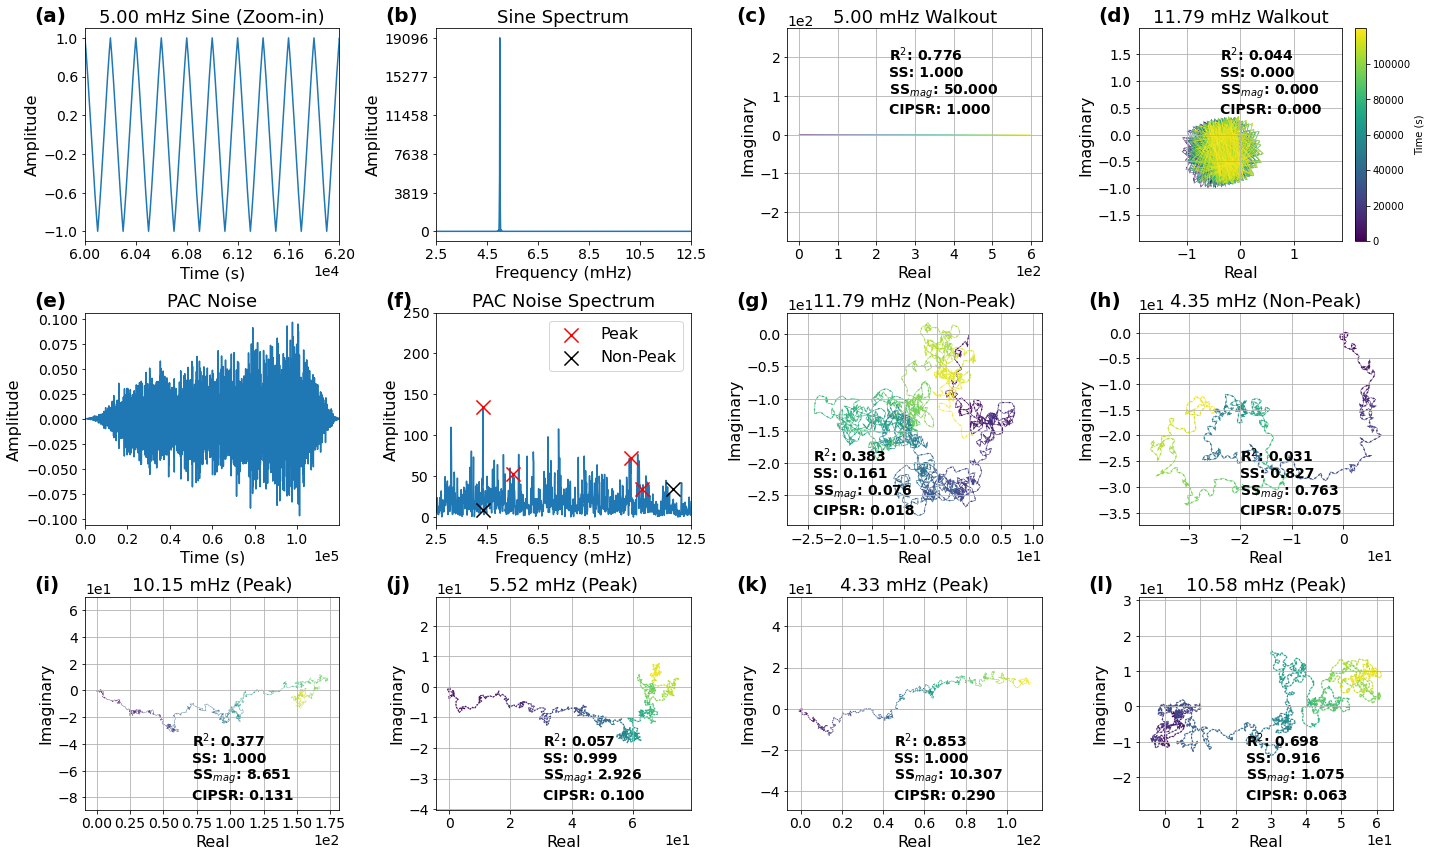

In [7]:
fft_amp = np.abs(np.fft.fft(pac_lowpass_noise))
plt.figure(figsize=(20, 12))
plt.subplot(3, 4, 1)
plt.plot(t, pac_lowpass_sin_wave)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[30000], t[31000]])
plt.ylabel('Amplitude', fontsize=16)
plt.title('{:.2f} mHz Sine (Zoom-in)'.format(sin_wave_freq*1e3), fontsize=18)
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
# ticks are too many, so make them less
plt.xticks(np.arange(t[30000], t[31000]*1.0001, (t[31000]-t[30000])/5), fontsize=14)
plt.yticks(np.arange(np.min(pac_lowpass_sin_wave), np.max(pac_lowpass_sin_wave)*1.0001, (np.max(pac_lowpass_sin_wave)-np.min(pac_lowpass_sin_wave))/5), fontsize=14)
# add (a) to the subplot
plt.text(-0.2, 1.03, '(a)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 2)
# plot the positive frequencies
spectrum_amp = np.abs(np.fft.fft(pac_lowpass_sin_wave))[:int(len(freqs)/2)]
plt.plot(freqs[:int(len(freqs)/2)], spectrum_amp)
plt.xlim([lower_freq, upper_freq])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('Sine Spectrum'.format(sin_wave_freq*1e3), fontsize=18)
# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5), 
              ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(np.arange(np.min(spectrum_amp), np.max(spectrum_amp)*1.0001, (np.max(spectrum_amp)-np.min(spectrum_amp))/5), fontsize=14)
# add (b) to the subplot
plt.text(-0.2, 1.03, '(b)', transform=plt.gca().transAxes, size=20, weight='bold')


plt.subplot(3, 4, 3)
visualize_walkout_for_subplot_sum_with_period(pac_lowpass_sin_wave, dt, sin_wave_freq)
R2 = calculate_walkout_R2(pac_lowpass_sin_wave, dt, sin_wave_freq)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_sin_wave, dt, sin_wave_freq) # CIPSR
#sum_ratio_unit = linearity_measure_by_sum_ratio_unit(pac_lowpass_sin_wave, dt, sin_wave_freq) # CIPSR-Unit
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_sin_wave, dt, sin_wave_freq)
plt.title('{:.2f} mHz Walkout'.format(sin_wave_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (c) to the subplot
plt.text(-0.2, 1.03, '(c)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 4)
random_freq = random_freq_list[0]
visualize_walkout_for_subplot_sum_with_period(pac_lowpass_sin_wave, dt, random_freq)
plt.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1]), cmap='viridis'), label='Time (s)')
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_sin_wave, dt, random_freq)
R2 = calculate_walkout_R2(pac_lowpass_sin_wave, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_sin_wave, dt, random_freq)
plt.title('{:.2f} mHz Walkout'.format(random_freq*1e3), fontsize=18)
plt.text(0.40, 0.60, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (d) to the subplot
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.text(-0.2, 1.03, '(d)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 5)
plt.plot(t, pac_lowpass_noise)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim([t[0], t[-1]])
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.gca().xaxis.get_offset_text().set_fontsize(14) 
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Noise', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (e) to the subplot
plt.text(-0.2, 1.03, '(e)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 6)
# plot the positive frequencies
plt.plot(freqs[:int(len(freqs)/2)], np.abs(np.fft.fft(pac_lowpass_noise))[:int(len(freqs)/2)])
plt.scatter(freqs[peaks], fft_amp[peaks], color='r', marker='x', s=200, label='Peak', zorder=10)
plt.scatter(random_freq_list, np.abs(np.fft.fft(pac_lowpass_noise))[np.where(np.isin(freqs, random_freq_list))], color='k', marker='x', s=200, label='Non-Peak', zorder=10)
plt.legend(loc='upper right', fontsize=16)
plt.xlim([lower_freq, upper_freq])
plt.ylim([-10, 250])
plt.xlabel('Frequency (mHz)', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title('PAC Noise Spectrum', fontsize=18)
# set the xticks in {:.2f} mHz format
plt.xticks(np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5),
                ['{:.1f}'.format(freq*1e3) for freq in np.arange(lower_freq, upper_freq*1.0001, (upper_freq-lower_freq)/5)], fontsize=14)
plt.yticks(fontsize=14)
# add (f) to the subplot
plt.text(-0.2, 1.03, '(f)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 7)
visualize_walkout_for_subplot_sum_with_period(pac_lowpass_noise, dt, random_freq)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.10, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (g) to the subplot
plt.text(-0.2, 1.03, '(g)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.subplot(3, 4, 8)
random_freq = random_freq_list[1]
visualize_walkout_for_subplot_sum_with_period(pac_lowpass_noise, dt, random_freq)
R2 = calculate_walkout_R2(pac_lowpass_noise, dt, random_freq)
sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, random_freq)
schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, random_freq)
plt.title('{:.2f} mHz (Non-Peak)'.format(random_freq*1e3) , fontsize=18)
plt.text(0.40, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add (h) to the subplot
plt.text(-0.2, 1.03, '(h)', transform=plt.gca().transAxes, size=20, weight='bold')

for i, peak in enumerate(peaks):
    plt.subplot(3, 4, 9+i)
    visualize_walkout_for_subplot_sum_with_period(pac_lowpass_noise, dt, freqs[peak])
    R2 = calculate_walkout_R2(pac_lowpass_noise, dt, freqs[peak])
    sum_ratio = linearity_measure_by_sum_ratio(pac_lowpass_noise, dt, freqs[peak])
    schuster_significance, ss_log = schuster_test_for_phasor_walkout(pac_lowpass_noise, dt, freqs[peak])
    plt.title('{:.2f} mHz (Peak)'.format(freqs[peak]*1e3), fontsize=18)
    plt.text(0.42, 0.05, 'R$^2$: {:.3f}\nSS: {:.3f}\nSS$_m$$_a$$_g$: {:.3f}\nCIPSR: {:.3f}'.format(R2, schuster_significance, ss_log, sum_ratio), fontsize=14, transform=plt.gca().transAxes, weight='bold', zorder=10, color='k')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if i == 0:
        # add (i) to the subplot
        plt.text(-0.2, 1.03, '(i)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 1:
        # add (j) to the subplot
        plt.text(-0.2, 1.03, '(j)', transform=plt.gca().transAxes, size=20, weight='bold')
    elif i == 2:
        # add (k) to the subplot
        plt.text(-0.2, 1.03, '(k)', transform=plt.gca().transAxes, size=20, weight='bold')
    else:
        # add (l) to the subplot
        plt.text(-0.2, 1.03, '(l)', transform=plt.gca().transAxes, size=20, weight='bold')

plt.tight_layout()
plt.savefig('Figure3.jpg', dpi=300)
plt.show()
plt.close()